In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import pycountry_convert as pc
import warnings
# import Current as C
# from sklearn.preprocessing import LabelEncoder

In [3]:
warnings.filterwarnings('ignore')
df = pd.read_csv("./FPData2.csv")
df.columns = ['Country', 'year', 'ladder', 'gdp', 'support', 'life_expec', 'freedom', 'generosity','corruption','positive', 'negative']
y = df.groupby('Country').count()
less = y[y['year'] <= 10].index.tolist()
df_update = df[~df['Country'].isin(less)]
year_list = range(2011, 2020)
df_11 = df_update[df_update['year'].isin(year_list)]
y1 = df_11.groupby('Country').count()
less1 = y1[y1['year'] <= 8].index.tolist()
df_update1 = df_11[~df_11['Country'].isin(less1)]
df_update2 = df_update1.dropna()

def continent(name):
    part1 = pc.country_name_to_country_alpha2(name)
    code = pc.country_alpha2_to_continent_code(part1)
    continent = pc.convert_continent_code_to_continent_name(code)
    return continent
df_update2['Country'] = df_update2['Country'].replace({'Congo (Brazzaville)':'Congo'})
df_update2['Country'] = df_update2['Country'].replace({'Turkiye':'Turkey'})
df_update2['Continent'] = df_update2.apply(lambda row: continent(row.Country), axis=1)
def cont_val(continent):
    continents = ['Asia', 'Africa', 'North America', 'South America', 'Oceania', 'Europe']
    return continents.index(continent)
df_update2['Continent'] = df_update2.apply(lambda row: cont_val(row.Continent), axis=1)



In [5]:
df_ind = df_update2.set_index('Country')

In [43]:
'''PCA Analysis'''

# SCREE PLOT

# Scaling
scaler = StandardScaler()
scaler.fit(df_ind)

df_scaled = scaler.transform(df_ind)

# PCA
pca = PCA(n_components=4)
model = pca.fit(df_scaled)

Z = pca.transform(df_scaled)

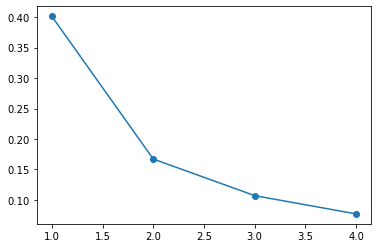

In [44]:
plt.plot(np.arange(1, 5), model.explained_variance_ratio_, marker='o')

<Figure size 432x288 with 0 Axes>

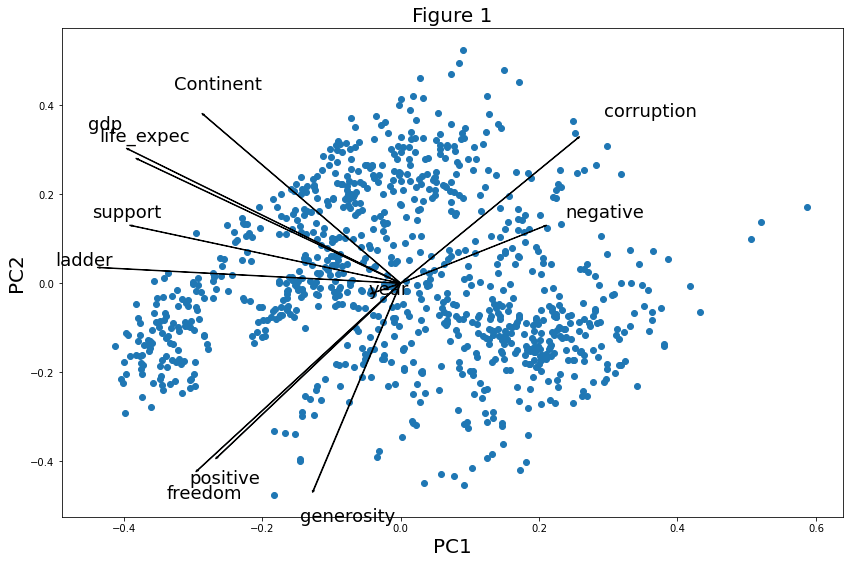

<Figure size 432x288 with 0 Axes>

In [45]:
# BIPLOT
pca = PCA(n_components=2)
PC_scores = pd.DataFrame(pca.fit_transform(df_scaled),
               columns = ['PC 1', 'PC 2'])
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], 
                        index=df_ind.columns)


PC1 = pca.fit_transform(df_scaled)[:,0]
PC2 = pca.fit_transform(df_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = df_ind.columns

fig, ax = plt.subplots(figsize=(14, 9))
 
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i])
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=18)
 
ax.scatter(PC1 * scalePC1,PC2 * scalePC2)
 
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 1', fontsize=20)
plt.figure()

In [8]:
model.components_

array([[-4.78059291e-02, -1.35849067e-01, -1.48690912e-01,
        -1.12806290e-02, -9.59918371e-01, -6.14269541e-03,
        -1.33447795e-03,  7.94023713e-03, -3.43315604e-03,
         1.72639127e-03, -1.88315631e-01],
       [ 9.95889896e-01, -1.66980373e-02, -2.83912205e-02,
        -2.30193623e-03, -2.73413317e-02,  7.57559232e-03,
        -1.86101030e-03, -2.68318741e-03,  7.39269082e-05,
         5.84035275e-03, -7.91417360e-02],
       [-7.43420317e-02, -4.49231211e-02, -8.06237196e-02,
        -1.43181490e-02,  2.12878505e-01,  7.03396244e-03,
         1.52213234e-02,  1.81079704e-04, -8.39865655e-04,
         4.13284148e-03, -9.69604940e-01],
       [-1.23485898e-02, -8.79106343e-01, -4.02895000e-01,
        -5.34454558e-02,  1.67725643e-01, -7.74786577e-02,
        -5.71470277e-02,  8.15480938e-02, -6.68016372e-02,
         2.97667191e-02,  1.11532636e-01]])

In [9]:
df_noE = df_update2.loc[(df_update2.Continent != 5)]
df_noE_ind = df_noE.set_index('Country')

In [10]:
'''PCA Analysis'''

# Mean countries
df_noE.groupby('Country').mean()
le = LabelEncoder()
df_encoded = df_noE_ind.groupby('Country').mean()
pca = PCA(n_components=4)
model1 = pca.fit(df_noE_ind)

# Transformed data
Z = pca.transform(df_noE_ind)

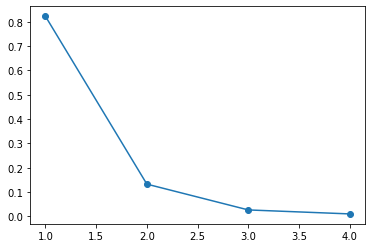

In [11]:
plt.plot(np.arange(1, 5), model1.explained_variance_ratio_, marker='o')

In [12]:
df_noA = df_update2.loc[(df_update2.Continent != 1)]
df_noA_ind = df_noA.set_index('Country')

In [13]:
'''PCA Analysis'''

# Mean countries
df_noA.groupby('Country').mean()
le = LabelEncoder()
df_encoded = df_noA_ind.groupby('Country').mean()
pca = PCA(n_components=4)
model1 = pca.fit(df_noA_ind)

# Transformed data
Z = pca.transform(df_noA_ind)

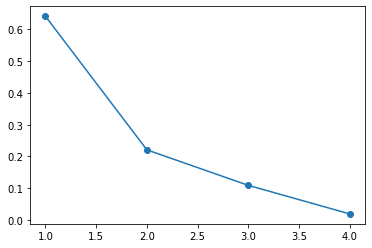

In [14]:
plt.plot(np.arange(1, 5), model1.explained_variance_ratio_, marker='o')

In [15]:
PC1 = pca.fit_transform(df_noA_ind)[:,0]
PC2 = pca.fit_transform(df_noA_ind)[:,1]
ldngs = pca.components_

In [25]:
scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = df_noA_ind.[3:11]

AttributeError: 'DataFrame' object has no attribute 'features'

In [29]:
modelnow = PCA(df_ind,
  normalize = True,
  ncomp = 2
)

TypeError: __init__() got an unexpected keyword argument 'normalize'

Text(0.5, 1.0, 'Figure 4')

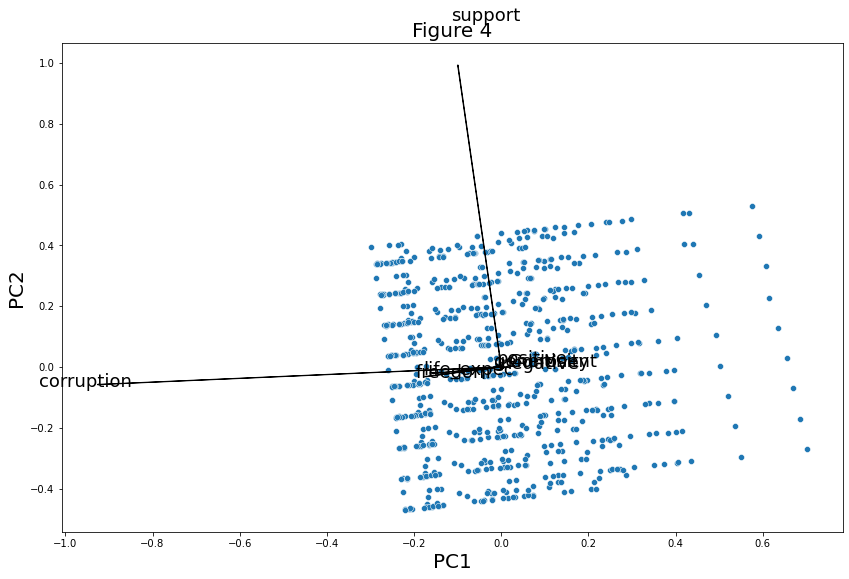

In [24]:
plt.figure(figsize=(14,9))
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=18)
 
sns.scatterplot(x=PC1 * scalePC1,
                y=PC2 * scalePC2)
 
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.title('Figure 4', fontsize=20)

NameError: name 'penguin' is not defined